In [92]:
# Load Libaries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
# Load Training Data
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [94]:
train.shape

(614, 13)

In [95]:
print (test.shape)
test.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [96]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [97]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Categorical Variables

In [98]:
train['Credit_History'] = train['Credit_History'].astype('object');
test['Credit_History'] = test['Credit_History'].astype('object');

In [99]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('object');
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('object');

In [100]:
# CAtegorical Variables
categorical_vars = train.dtypes.loc[train.dtypes == 'object'].index
categorical_vars

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [101]:
np.arange(1, len(categorical_vars) + 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

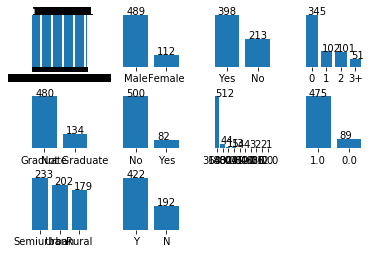

In [102]:
%matplotlib inline
for var, i in zip(categorical_vars,np.arange(1, len(categorical_vars)+1)):
    dep = train[var].value_counts()
    plt.subplot(len(categorical_vars)/3,4,i)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    plt.bar(range(len(dep.index)), dep.values)
    for i in range(0,len(dep.values),1):
        plt.text(i-0.3, dep.values[i], dep.values[i])
    plt.xticks(range(len(dep)))
    plt.gca().set_xticklabels(dep.index)
    for spine in plt.gca().spines:
        plt.gca().spines[spine].set_visible(False)
    plt.yticks([]);

# Continous Variables

In [103]:
continous_vars = train.dtypes.loc[train.dtypes != 'object'].index
continous_vars

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')

In [104]:
train[continous_vars].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


#### Log Transformation for Applicant Income variable

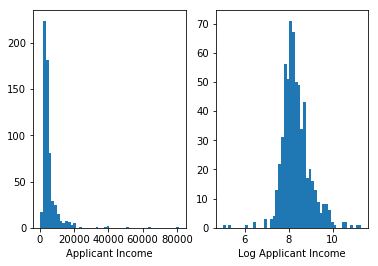

In [105]:
var = train['ApplicantIncome']
plt.subplot(121)
plt.hist(var, bins = 50);
plt.xlabel('Applicant Income');

plt.subplot(122)
plt.hist(np.log(var), bins = 50);
plt.xlabel('Log Applicant Income');

In [106]:
train['ApplicantIncome'] = np.log(train['ApplicantIncome'] + 1)

In [107]:
test['ApplicantIncome'] = np.log(test['ApplicantIncome'] + 1) 
test['ApplicantIncome'].head()

0    8.651899
1    8.031710
2    8.517393
3    7.758333
4    8.094684
Name: ApplicantIncome, dtype: float64

#### loanAmount sqrt transformation

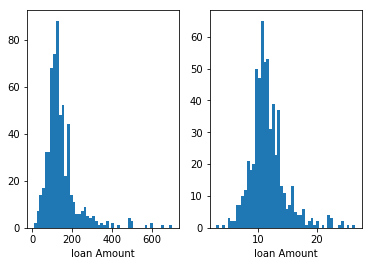

In [108]:
var = train['LoanAmount']
plt.subplot(1,2,1)
plt.hist(var.dropna(), bins = 50);
plt.xlabel('loan Amount');
plt.subplot(1,2,2)
plt.hist(np.sqrt(var.dropna()), bins = 50);
plt.xlabel('loan Amount');

In [109]:
train['LoanAmount'] = np.sqrt(train['LoanAmount'])
test['LoanAmount'] = np.sqrt(test['LoanAmount'])
test['LoanAmount'].head()

0    10.488088
1    11.224972
2    14.422205
3    10.000000
4     8.831761
Name: LoanAmount, dtype: float64

#### CoapplicantIncome transformation

In [110]:
train.CoapplicantIncome = np.log(train.CoapplicantIncome + 1)


In [111]:
test.CoapplicantIncome = np.log(test.CoapplicantIncome + 1)

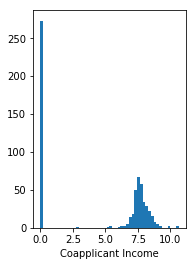

In [112]:
var = train.CoapplicantIncome
plt.subplot(121)
plt.hist(var, bins = 50);
plt.xlabel('Coapplicant Income');

# CAN SPERATE THIS  INTO TWO FEATURES

In [148]:
train[continous_vars].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,8.341510,4.290129,11.695795
std,0.645035,3.875873,2.995905
min,5.017280,0.000000,3.000000
25%,7.965024,0.000000,10.012469
50%,8.246303,7.081125,11.313708
75%,8.664922,7.739897,12.835487
max,11.302217,10.637489,26.457513


# Handling Missing Values

In [113]:
# Finding Missing values
np.sum(pd.isnull(train))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Computing Mode

In [114]:
from scipy.stats import mode
mode(train['Gender'].astype(str)).mode[0]

D:\Personal\Setups\Anaconda440\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Male'

### Imputing categorical variables with mode values

In [115]:
#Impute values 
for var in categorical_vars[np.sum(pd.isnull(train[categorical_vars])).values != 0]:
    train[var].fillna(mode(train[var].astype(str)).mode[0], inplace = True)
    test[var].fillna(mode(test[var].astype(str)).mode[0], inplace = True)

D:\Personal\Setups\Anaconda440\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [116]:
# Cheking Missing Values
np.sum(pd.isnull(train[categorical_vars]))

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

### Imputing Continous Variables with median Values

In [117]:
np.sum(pd.isnull(train[continous_vars]))

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

In [118]:
# values to treat
continous_vars[np.sum(pd.isnull(train[continous_vars])).values != 0]

Index(['LoanAmount'], dtype='object')

### Imputing Handling Continuous Variables

In [119]:
for var in continous_vars[np.sum(pd.isnull(train[continous_vars])).values != 0]:
    train[var].fillna(np.median(train[var].dropna()), inplace = True)
    test[var].fillna(np.median(test[var].dropna()), inplace = True)    

In [120]:
# Checking values
np.sum(pd.isnull(train[continous_vars]))

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

#### Resetting INDEX

In [121]:
train.index = train['Loan_ID']
pred_vars = train.columns.drop('Loan_ID')
train = train[pred_vars]

In [122]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,8.674197,0.000000,11.313708,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,11.313708,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,8.124038,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,10.954451,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,8.699681,0.000000,11.874342,360,1,Urban,Y


In [123]:
test.index = test['Loan_ID']
test = test[test.columns.drop('Loan_ID')]

In [124]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,8.651899,0.000000,10.488088,360,1,Urban
LP001022,Male,Yes,1,Graduate,No,8.031710,7.313887,11.224972,360,1,Urban
LP001031,Male,Yes,2,Graduate,No,8.517393,7.496097,14.422205,360,1,Urban
LP001035,Male,Yes,2,Graduate,No,7.758333,7.842671,10.000000,360,1.0,Urban
LP001051,Male,No,0,Not Graduate,No,8.094684,0.000000,8.831761,360,1,Urban


In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for var in categorical_vars[1:-1]:
    train[var] = le.fit_transform(train[var].astype(str))
    test[var] = le.fit_transform(test[var].astype(str))

test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0,0,0,8.651899,0.000000,10.488088,7,1,2
LP001022,1,1,1,0,0,8.031710,7.313887,11.224972,7,1,2
LP001031,1,1,2,0,0,8.517393,7.496097,14.422205,7,1,2
LP001035,1,1,2,0,0,7.758333,7.842671,10.000000,7,1,2
LP001051,1,0,0,1,0,8.094684,0.000000,8.831761,7,1,2


# Label Encoder

In [128]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,8.674197,0.000000,11.313708,6,1,2,Y
LP001003,1,1,1,0,0,8.430327,7.319202,11.313708,6,1,0,N
LP001005,1,1,0,0,1,8.006701,0.000000,8.124038,6,1,2,Y
LP001006,1,1,0,1,0,7.857094,7.765993,10.954451,6,1,2,Y
LP001008,1,0,0,0,0,8.699681,0.000000,11.874342,6,1,2,Y


In [131]:
# Encoding Loan Status
train.Loan_Status = le.fit_transform(train['Loan_Status'].astype(str))
train.Loan_Status.head()

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
Name: Loan_Status, dtype: int64

# Model Building

In [132]:
y = train['Loan_Status']
X_cols = train.columns.drop(['Loan_Status'])
X = train[X_cols]
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,1,0,0,0,0,8.674197,0.000000,11.313708,6,1,2
LP001003,1,1,1,0,0,8.430327,7.319202,11.313708,6,1,0
LP001005,1,1,0,0,1,8.006701,0.000000,8.124038,6,1,2
LP001006,1,1,0,1,0,7.857094,7.765993,10.954451,6,1,2
LP001008,1,0,0,0,0,8.699681,0.000000,11.874342,6,1,2


In [133]:
y.head()

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
Name: Loan_Status, dtype: int64

In [134]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
logitreg = LogisticRegression().fit(X_train, y_train)
logitreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Accuracy Score

In [141]:
from sklearn.metrics import accuracy_score
print ('Training Accuracy: ', accuracy_score(y_train, logitreg.predict(X_train)))
print ('Validation Set Accuracy: ', accuracy_score(y_test, logitreg.predict(X_test)))

Training Accuracy:  0.8
Validation Set Accuracy:  0.831168831169


#### Confusion Matrix

In [142]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix");
    else:
        print('Confusion matrix, without normalization');

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[ 19  24]
 [  2 109]]


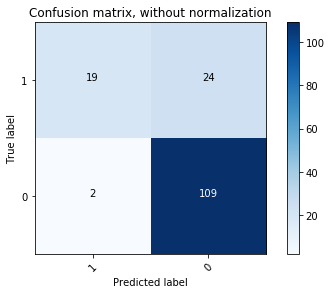

In [145]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, logitreg.predict(X_test))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = y.unique(),
                      title='Confusion matrix, without normalization')


## DecisionTree Classifier

In [146]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 30)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=30,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

#### Accuracy Score

In [147]:
from sklearn.metrics import accuracy_score
print ('Training Accuracy: ', accuracy_score(y_train, dtc.predict(X_train)))
print ('Validation Set Accuracy: ', accuracy_score(y_test, dtc.predict(X_test)))

Training Accuracy:  0.802173913043
Validation Set Accuracy:  0.831168831169


#### Confusion Matrix

In [144]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, dtc.predict(X_test)), classes = y.unique(),
                      title='Confusion matrix, without normalization')

NameError: name 'dtc' is not defined

# Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

atrain = []
atest = []
for i in range(10):
    rf = RandomForestClassifier(max_depth = i+1, random_state = 0)
    rf.fit(X_train, y_train)
    atrain = np.append(atrain, accuracy_score(y_train, rf.predict(X_train)))
    atest = np.append(atest, accuracy_score(y_test, rf.predict(X_test)))

#### Accuracy Score Plot

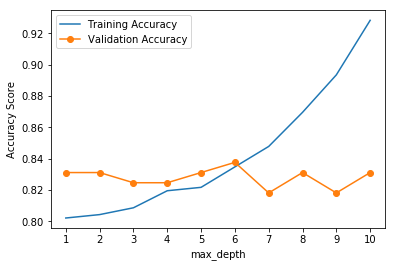

In [158]:
plt.figure()
plt.plot(range(1,11), atrain,'-',label = 'Training Accuracy')
plt.plot(range(1,11), atest, '-o', label = 'Validation Accuracy')
plt.legend()
plt.xticks(range(1,11));
plt.xlabel('max_depth')
plt.ylabel('Accuracy Score')

In [165]:
rf6 = RandomForestClassifier(max_depth = 7).fit(X_train, y_train)
print ('Training Accuracy: ', accuracy_score(y_train,rf6.predict(X_train)))
print ('Validation Set Accuracy: ', accuracy_score(y_test, rf6.predict(X_test)))

Training Accuracy:  0.858695652174
Validation Set Accuracy:  0.831168831169


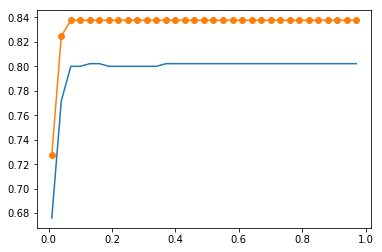

In [191]:
from sklearn.linear_model import LogisticRegression
atrain = []
atest = []
x =  np.arange(0.01,1,0.03)
for i in x:
    logreg = LogisticRegression(C = i, penalty='l2').fit(X_train,y_train)
    atrain = np.append(atrain, accuracy_score(y_train, logreg.predict(X_train)))
    atest = np.append(atest, accuracy_score(y_test, logreg.predict(X_test)))

plt.figure()
plt.plot(x, atrain, '-', label = 'Training')
plt.plot(x, atest, '-o', label = 'Testing')


In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_mm = scaler.transform(X_train)
X_test_mm = scaler.transform(X_test)

logreg = LogisticRegression(C = 0.2, penalty='l2').fit(X_train_mm, y_train)
accuracy_score(y_test, logreg.predict(X_test_mm))

0.83116883116883122

In [200]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_mm = scaler.transform(X_train)
X_test_mm = scaler.transform(X_test)

rigreg = RidgeClassifier().fit(X_train_mm, y_train)
accuracy_score(y_test, rigreg.predict(X_test_mm))

0.83766233766233766

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
X_train_mm = scale(X_train[continous_vars])
X_test_mm = scale(X_test[continous_vars])

logreg = LogisticRegression(C = 0.01, penalty='l2').fit(X_train_mm, y_train)
accuracy_score(y_test, logreg.predict(X_test_mm))

0.72727272727272729

In [220]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.23, penalty='l2').fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.83766233766233766

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.23, penalty='l2').fit(train, y_train)
accuracy_score(y_test, lr.predict(X_test))

In [235]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,0.005511,-0.038910,-0.025691,0.037585,1,2,1
LP001003,1,1,1,0,0,-0.010148,-0.002718,-0.025691,0.037585,1,0,0
LP001005,1,1,0,0,1,-0.029727,-0.038910,-0.115416,0.037585,1,2,1
LP001006,1,1,0,1,0,-0.034885,0.017682,-0.037268,0.037585,1,2,1
LP001008,1,0,0,0,0,0.007378,-0.038910,-0.006878,0.037585,1,2,1
